In [17]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
from scipy.optimize import curve_fit
from statistics import mean
import sys
sys.setrecursionlimit(20000)

## Linear Search

In [18]:
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

## Binary Search

In [19]:
def binary_search(arr, low, high, key):
 
    # Check base case
    if high >= low:
        mid = (high + low) // 2
        
        # If element is present at the middle itself
        if arr[mid] == key:
            return mid
        # be present in left subarray
        elif arr[mid] > key:
            return binary_search(arr, low, mid - 1, key)
        else:
            return binary_search(arr, mid + 1, high, key)
    else:
        return -1

#### Testing Binary Search

In [20]:
import random
array = list(range(0,10))

for i in array:
    print(i, end=" ")

key = random.randint(0, len(array) - 1)

index = binary_search(array, 0, len(array) - 1, key)
# want to get the index of 7
print(f"\nindex of {key} is {index}")


0 1 2 3 4 5 6 7 8 9 
index of 6 is 6


## Quick Sort

In [21]:
def partition(array, low, high):
    
    pivot = array[high]
    
    i = low - 1

    for j in range(low, high):
        if array[j] <= pivot:

            i = i + 1
 
            (array[i], array[j]) = (array[j], array[i])

    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    return i + 1
  
def quickSort(array, low, high):
    if low < high:
 
        pi = partition(array, low, high)
 
        quickSort(array, low, pi - 1)
        
        quickSort(array, pi + 1, high)


#### Testing Quick Sort

In [22]:
import random
array = list(range(0,20))
random.shuffle(array)

print("Original Array:")
for i in array:
    print(f'[{i}]', end=" ")

print("\n\nSorted Array:")

quickSort(array, 0, len(array) - 1)
for i in array:
    print(f'[{i}]', end=" ")

Original Array:
[0] [8] [11] [16] [17] [4] [9] [1] [19] [7] [12] [14] [10] [3] [13] [2] [15] [6] [18] [5] 

Sorted Array:
[0] [1] [2] [3] [4] [5] [6] [7] [8] [9] [10] [11] [12] [13] [14] [15] [16] [17] [18] [19] 

# Three Different Algorithms 
### (Linear Search) vs (QuickSort + Binary Search) vs (Worse Case QuickSort and Binary Search)

In [23]:

from statistics import mean
def linear_time(array_size, key):
    linear_times = []
    # Creates an Array of Appropriate Size and Shuffles It
    array = list(range(0,array_size))
    random.shuffle(array)
    
    # Gets a list of times
    for _ in range(0, 100):
        start = time.perf_counter()
        linear_search(array, key)
        end = time.perf_counter()
        linear_times.append(end - start)
        random.shuffle(array)
    return mean(linear_times)

def quickBinarySearch(array_size, key):
    quickb_times = []
    
    # Creates an Array of Appropriate Size and Shuffles It
    array = list(range(0, array_size))
    random.shuffle(array)

    for _ in range(0, 100):
        start = time.perf_counter()
        quickSort(array, 0, len(array) - 1)
        # DEBUG
        # print(array)
        # print(f"Found {key} at {binary_search(array, 0, len(array) - 1, key)}")
        binary_search(array, 0, len(array) - 1, key)
        end = time.perf_counter()
        quickb_times.append(end - start)
        random.shuffle(array)
    return mean(quickb_times)

def worstBinarySearch(array_size, key):
    worstb_times = []
    
    array = list(range(0, array_size))
    array.reverse()
    
    for _ in range(0, 100):
        start = time.perf_counter()
        quickSort(array, 0, len(array) - 1)
        binary_search(array, 0, len(array) - 1, key)
        end = time.perf_counter()
        # DEBUG
        # print(array)
        worstb_times.append(end - start)
        random.shuffle(array)
    return mean(worstb_times)
    

# 100 Random Tasks

In [24]:
import random
import time

array_sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
# array_sizes = [i ** 2 for i in range(1, 100)] # DEBUG
key = 7

linearSearch_times = []
quickBinary_times = []

for i in array_sizes:
    linearSearch_times.append(linear_time(i, key))

for i in array_sizes:
    quickBinary_times.append(quickBinarySearch(i, key))

# DEBUG
# quickBinarySearch(20, 7)

In [25]:
linearSearch_times

[1.2620001871255225e-06,
 1.113000289478805e-06,
 7.899997945060022e-07,
 1.3729998681810685e-06,
 2.5410000307601877e-06,
 6.199999988893978e-06,
 1.9983999991382006e-05,
 3.619599981902866e-05,
 8.264000003691762e-05,
 0.0001692749998619547]

In [26]:
quickBinary_times

[4.917999940516893e-06,
 1.063700005033752e-05,
 2.7192999878025147e-05,
 5.8913999928336126e-05,
 0.00015022500010672957,
 0.00047420700026123085,
 0.001246223999914946,
 0.0022004519998154136,
 0.005247652999896673,
 0.011649264999941806]

## Curve Fitting

In [31]:
# Curve fitting
def linear_model(x, a, b):
    return a * x + b

def n_squared_model(x, a, b):
    return a * x ** 2 + b

def n_log_n_model(x, a, b):
    return a * (x * np.log(x * b))

params_linear, _ = curve_fit(linear_model, array_sizes, linearSearch_times)
params_quick_binary, _ = curve_fit(n_log_n_model, array_sizes, quickBinary_times)

## Plotting

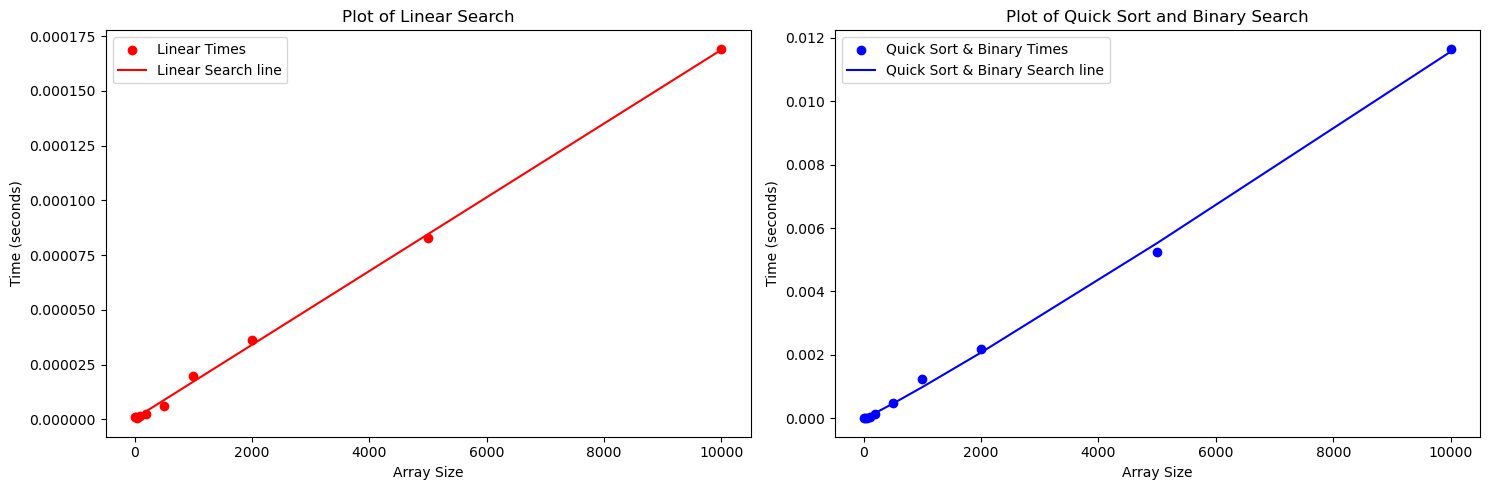

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (15, 5))

linear = axs[0]
quickbinary = axs[1]

# Plotting insertion sorts
linear.scatter(array_sizes, linearSearch_times, label= 'Linear Times', color= 'red')
linear.plot(array_sizes, linear_model(np.array(array_sizes), *params_linear), label= 'Linear Search line', color= 'red')

quickbinary.scatter(array_sizes, quickBinary_times, label= 'Quick Sort & Binary Times', color= 'blue')
quickbinary.plot(array_sizes, n_log_n_model(np.array(array_sizes), *params_quick_binary), label= 'Quick Sort & Binary Search line', color= 'blue')

linear.set_title('Plot of Linear Search')
linear.set_xlabel("Array Size")
linear.set_ylabel("Time (seconds)")

quickbinary.set_title('Plot of Quick Sort and Binary Search')
quickbinary.set_xlabel("Array Size")
quickbinary.set_ylabel("Time (seconds)")

linear.legend()
quickbinary.legend()

plt.tight_layout()
plt.show()

## Question 4

The Linear Search has a standard O(n) complexity. In our findings, the combination of Quick Sort and Binary Search has a best fit line that matches O(n log(n)). This coincides with the average case complexity for a Quick Sort. However, as seen from the plots, linear search is a lot faster because it doesn't have to sort prior to searching the array.

## Question 5, Worst Case for QuickSort

In [ ]:
import random
import time

array_sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
# array_sizes = [i ** 2 for i in range(100)] # DEBUG
key = 7

worstBinary_times = []

for i in array_sizes:
    worstBinary_times.append(worstBinarySearch(i, key))

worstBinary_times

## Curve Fitting

In [ ]:
# Curve fitting

def n_squared_model(x, a, b):
    return a * x ** 2 + b

params_worst_binary, _ = curve_fit(n_squared_model, array_sizes, worstBinary_times)

## Plotting

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize= (7, 5))

worstbinary = axs

worstbinary.scatter(array_sizes, worstBinary_times, label= 'Quick Sort & Binary Times (Worst)', color= 'blue')
worstbinary.plot(array_sizes, n_squared_model(np.array(array_sizes), *params_worst_binary), label= 'Quick Sort & Binary Search line (Worst)', color= 'blue')

worstbinary.set_title('Plot of Quick Sort and Binary Search (Worst)')
worstbinary.set_xlabel("Array Size")
worstbinary.set_ylabel("Time (seconds)")

worstbinary.legend()

plt.tight_layout()
plt.show()